<a href="https://colab.research.google.com/github/ericwarren9/ST-590/blob/main/Warren_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ST 590 Homework 2 By: Eric Warren

## Part 1: List and `NumPy` Practice

For this part, import the `numpy` library. We’ll use the new way to do random number generation using `numpy` to create some data and plot it.

A) Generate 30 values from a Poisson distribution with λ = 3 and print those out. Note: each time you run your code you’ll get different values. To avoid this, first set a seed for your random number generator.

In [1]:
import numpy as np # import module
rng = np.random.default_rng(9) # Generate random number
poisson = rng.poisson(3, 30)
poisson

array([8, 2, 0, 5, 9, 1, 3, 1, 2, 3, 3, 3, 5, 0, 3, 4, 1, 4, 5, 4, 2, 6,
       3, 2, 1, 4, 6, 4, 6, 2])

B) Use `numpy`’s mean function to find the mean of your 30 values.

In [2]:
np.mean(poisson) # Get mean of distribution

3.4

C) Use a list comprehension to generate 5000 data sets from the Poisson with mean 3 and return the mean (within the list comprehension - no need to return the values themselves).

In [3]:
poisson_means = [] # Initialize empty list
poisson_means = [np.mean(np.random.poisson(3, 30)) for _ in range(5000)] # List comprehension for 5000 X_i ~ Pois(3) with 30 values in each data set

D) Now run the code below to create a histogram of the means. You should see a histogram that looks roughly like a Normal distribution with mean 3 and standard deviation $\sqrt{\frac{1}{10}}$.

(array([  14.,   72.,  351.,  966., 1414., 1333.,  619.,  192.,   36.,
           3.]),
 array([1.86666667, 2.10666667, 2.34666667, 2.58666667, 2.82666667,
        3.06666667, 3.30666667, 3.54666667, 3.78666667, 4.02666667,
        4.26666667]),
 <BarContainer object of 10 artists>)

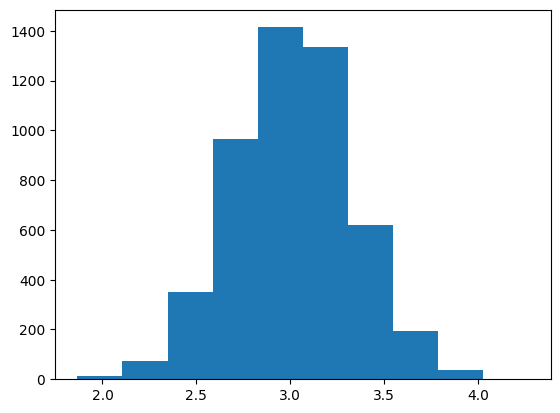

In [4]:
import matplotlib.pyplot as plt # Import for graphing
plt.hist(poisson_means) # Plot the different means generated

E) Lastly, we’ll wrap the above process into a function.

- The function should take in
  - a value for the mean of the poisson - with a default of 3.1
  - a value for the sample size - with a default value of 30
  - a value for the number bins for the histogram - with a default value of None. The bins can be set in the plt.hist() function via plt.hist(your_list_of_means, bins = 15)
- The function should check if the bins argument is None.
  - If True then use the plt.hist() code without specifying the bins in order to use the default bin number.
 - If False then specify the bins user the value specified by the user.
- The function should output a graph. Test it on a few combinations of your inputs!

In [5]:
def poisson_mean_histogram(mean = 3.1, sample_size = 30, bins = None):
  """
  Here we are going to first generate 5000 different random Poisson distributions with mean 3.1 and sample size 30
  Then we are going to graph the means based on a histogram with the user specifying the number of bins
  The default of bins is None meaning whatever matplotlib thinks is a good bins amount but you can change to your liking with the bins argument
  """
  pois_means = [] # Initialize empty list

  # List comprehension for 5000 X_i ~ Pois(Mean -- user inputted) with sample_size number of values in each data set
  pois_means = [np.mean(np.random.poisson(mean, sample_size)) for _ in range(5000)]

  # Make the histogram based on the condition if bins is set
  if bins == None:
    plot = plt.hist(pois_means)
  else:
    plot = plt.hist(pois_means, bins = bins)

  # Return the plot
  return plot

Now we are going to test our function three times

(array([  13.,   88.,  312.,  709., 1362., 1276.,  724.,  368.,  130.,
          18.]),
 array([2.        , 2.21666667, 2.43333333, 2.65      , 2.86666667,
        3.08333333, 3.3       , 3.51666667, 3.73333333, 3.95      ,
        4.16666667]),
 <BarContainer object of 10 artists>)

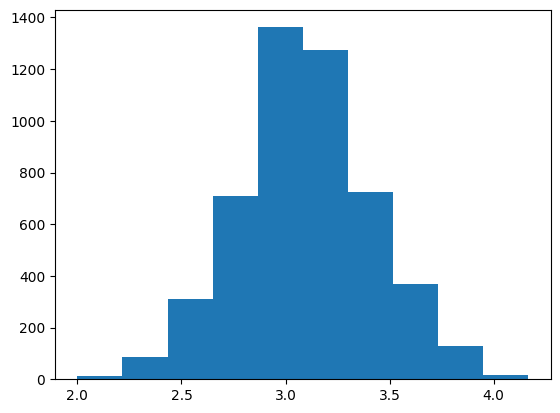

In [6]:
poisson_mean_histogram() # All defaults

(array([   5.,   62.,  341.,  878., 1412., 1361.,  672.,  208.,   54.,
           7.]),
 array([2.35 , 2.484, 2.618, 2.752, 2.886, 3.02 , 3.154, 3.288, 3.422,
        3.556, 3.69 ]),
 <BarContainer object of 10 artists>)

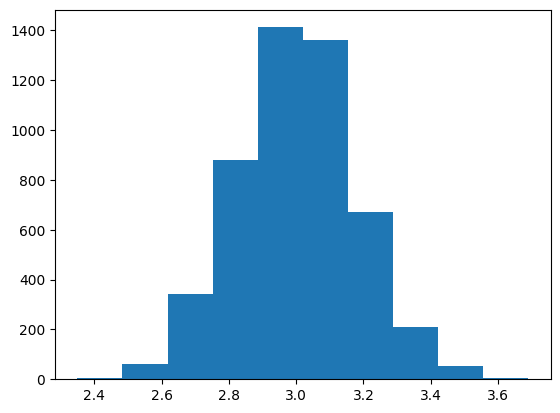

In [7]:
poisson_mean_histogram(mean = 3, sample_size = 100) # Change everything but the bins

(array([4.000e+00, 2.400e+01, 7.700e+01, 2.030e+02, 4.800e+02, 8.150e+02,
        1.019e+03, 9.510e+02, 6.980e+02, 4.430e+02, 1.890e+02, 7.300e+01,
        1.800e+01, 5.000e+00, 1.000e+00]),
 array([2.37      , 2.46066667, 2.55133333, 2.642     , 2.73266667,
        2.82333333, 2.914     , 3.00466667, 3.09533333, 3.186     ,
        3.27666667, 3.36733333, 3.458     , 3.54866667, 3.63933333,
        3.73      ]),
 <BarContainer object of 15 artists>)

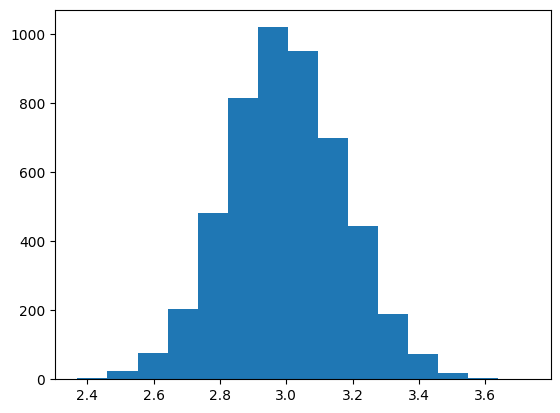

In [8]:
poisson_mean_histogram(mean = 3, sample_size = 100, bins = 15) # Change everything

## Part 2: Dictionary Practice

In this part, we’ll read in a raw text file. Then we’ll do the first steps of a basic sentiment analysis. After reading the data in, we’ll use string methods to split the data into words. We’ll store the words as
keys in dictionaries with the value being the count of the number of times the words occurs.

### Part A: Read in Data

First, we need to read the data into python. Using the code below will read the text of Oliver Twist into our python session (downloaded from [Project
Gutenburg](https://www.gutenberg.org/)).

In [9]:
import urllib.request # import package

url = "https://www4.stat.ncsu.edu/~online/datasets/charles-dickens-oliver-twist.txt" # Get URL

urllib.request.urlretrieve(url, 'charles-dickens-oliver-twist.txt') # Read in URL

# Now that we have a reference to the url, read the data into a string
with open('charles-dickens-oliver-twist.txt', 'r') as f:
  lines = f.read()

### Part B: Showing Data

The text has now been read in as one long string called **`lines`**. Print out the first 1000 characters of the string. Then print out the last 1000 characters.

First we are printing the first 1000 characters

In [10]:
lines[ : 1000]

"\ufeffThe Project Gutenberg EBook of Oliver Twist, by Charles Dickens\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.net\n\n\nTitle: Oliver Twist\n\nAuthor: Charles Dickens\n\nPosting Date: October 10, 2008 [EBook #730]\nRelease Date: November, 1996\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK OLIVER TWIST ***\n\n\n\n\nProduced by Peggy Gaugy and Leigh Little.  HTML version by Al Haines.\n\n\n\n\n\n\n\n\n\nOLIVER TWIST\n\nOR\n\nTHE PARISH BOY'S PROGRESS\n\n\nBY\n\nCHARLES DICKENS\n\n\n\n\nCONTENTS\n\n       I  TREATS OF THE PLACE WHERE OLIVER TWIST WAS BORN AND OF THE\n          CIRCUMSTANCES ATTENDING HIS BIRTH\n      II  TREATS OF OLIVER TWIST'S GROWTH, EDUCATION, AND BOARD\n     III  RELATES HOW OLIVER TWIST WAS VERY NEAR GETTING A PLACE WHICH\n          WOUL

Now we are printing the last 1000 characters

In [11]:
lines[-1000 : ]

'glaf.org/donate\n\n\nSection 5.  General Information About Project Gutenberg-tm electronic\nworks.\n\nProfessor Michael S. Hart is the originator of the Project Gutenberg-tm\nconcept of a library of electronic works that could be freely shared\nwith anyone.  For thirty years, he produced and distributed Project\nGutenberg-tm eBooks with only a loose network of volunteer support.\n\n\nProject Gutenberg-tm eBooks are often created from several printed\neditions, all of which are confirmed as Public Domain in the U.S.\nunless a copyright notice is included.  Thus, we do not necessarily\nkeep eBooks in compliance with any particular paper edition.\n\n\nMost people start at our Web site which has the main PG search facility:\n\n     http://www.gutenberg.net\n\nThis Web site includes information about Project Gutenberg-tm,\nincluding how to make donations to the Project Gutenberg Literary\nArchive Foundation, how to help produce our new eBooks, and how to\nsubscribe to our email newsletter 

### Part C: Filtering Data

You should see that there is a lot of "front" and "end" matter. We want to subset the string first to remove the front and end matter. That is, we want to remove everything up to "CHAPTER I" (but leave "CHAPTER I" in the resulting text) and remove everything that isn't part of the actual book
at the end ("End of the Project Gutenberg EBook").

Hints:
- Use the `.find()` string method to find indices corresponding to each of the quoted text bits above. Then subset the string using slicing.
- Print out the first 250 characters and the last 250 characters of the resulting object

First we want to find where "CHAPTER I" occurs

In [12]:
lines.find("CHAPTER I")

6105

Now we want to find where "End of the Project Gutenberg EBook" occurs

In [13]:
lines.find("End of the Project Gutenberg EBook")

898242

Now let us slice and create a new object called **`book`** that contains the material of the passage with including these elements we want

In [14]:
book = lines[lines.find("CHAPTER I") : lines.find("End of the Project Gutenberg EBook")] # Get elements of what we need -- this is a better way in case the book elements change in the future
# book = lines[6105 : 898242] # Not as good since if the book updates then our start and end points change but this does work

We will now print the first 250 characters

In [15]:
book[ : 250]

'CHAPTER I\n\nTREATS OF THE PLACE WHERE OLIVER TWIST WAS BORN AND OF THE\nCIRCUMSTANCES ATTENDING HIS BIRTH\n\nAmong other public buildings in a certain town, which for many reasons\nit will be prudent to refrain from mentioning, and to which I will\nassign '

And now print the last 250 characters

In [16]:
book[-250 : ]

'd by the love--the love beyond the\ngrave--of those whom they knew in life, I believe that the shade of\nAgnes sometimes hovers round that solemn nook. I believe it none the\nless because that nook is in a Church, and she was weak and erring.\n\n\n\n\n\n\n\n\n\n\n'

### Part D: Make a Dictionary

Our goal is to iterate through the words in the book and count the number of times each word occurs. We can use a dictionary to store this type of data! For instance, you’ll end up with a key of “the” with a corresponding value being the number of times “the” occurred.

Some hints:
- Replace all the \n values with spaces as we did previously
- Split the string by spaces and save that resulting list
- Initialize a dictionary to save your words (keys) and counts in (values)
- Import the `string` module as you’ll need some things from that
- Use a for loop, iterating over the list elements. When iterating:
  - If you get a space, ignore that iteration of the loop (that is move to the next iteration)
  - Convert each ‘word’ to lower case
  - We’ll need to remove any punctuation (for instance, “end.” would need the ‘.’ removed).
    - The object **string.punctuation** has a list of punctuation marks
    - You can write a loop inside your loop (a nested for loop) that iterates over the values in **string.punctuation**. If the punctuation value exists in the ‘word’ then you can use the `.replace()` method to replace it with an empty string “ “. This loop should remove any punctuation! (Note: this will make words like didn’t into didnt, that’s fine - ignore that as it will still count appropriately for the most part.)
  - Now the ‘word’ is processed and we are ready to count. Use if/else logic to check if the the word already exists in the dictionary. If it does, add one to the associated value. If not, add that key to the dictionary with a value of 1.

First replace all the '\n' values

In [17]:
book = book.replace('\n', ' ')

Split the string by spaces and save result as list

In [18]:
word_list = book.split()

Initialize a dictionary to save your words (keys) and counts in (values)

In [19]:
word_dict = {}

Import the string module as you’ll need some things from that

In [20]:
import string as st

Use a for loop, iterating over the list elements. When iterating:
- If you get a space, ignore that iteration of the loop (that is move to the next iteration)
- Convert each ‘word’ to lower case
- We’ll need to remove any punctuation (for instance, “end.” would need the ‘.’ removed).
  - The object **string.punctuation** has a list of punctuation marks
  - You can write a loop inside your loop (a nested for loop) that iterates over the values in **string.punctuation**. If the punctuation value exists in the ‘word’ then you can use the `.replace()` method to replace it with an empty string “ “. This loop should remove any punctuation! (Note: this will make words like didn’t into didnt, that’s fine - ignore that as it will still count appropriately for the most part.)
- Now the ‘word’ is processed and we are ready to count. Use if/else logic to check if the the word already exists in the dictionary. If it does, add one to the associated value. If not, add that key to the dictionary with a value of 1.
- We will show the first 10 dictionary pair values to show that this works

In [21]:
# Import itertools to help with slicing later
import itertools

# Make the for loop
for i in word_list:

  # Skip spaces
  if i == ' ':
    continue

  # Make lowercase
  i = i.lower()

  # Remove punctuation
  i = i.translate(str.maketrans('', '', st.punctuation))

  # Make if else to get the key and values to the dictionary
  if i in word_dict:
    word_dict[i] = word_dict.get(i) + 1
  else:
    word_dict[i] = 1

dict(itertools.islice(word_dict.items(), 10)) # Show first 10 key pairs to show it works



{'chapter': 61,
 'i': 1625,
 'treats': 4,
 'of': 3829,
 'the': 9558,
 'place': 115,
 'where': 189,
 'oliver': 746,
 'twist': 54,
 'was': 1783}

### Part E: Show the Top 40 Most Used Words

We want to print out the 40 most prevalent words and how prevalent they were (i.e. the 40 most prevalent key/value pairs). We can use the `sorted()` function to do this.
- Use the `sorted()` function with appropriate key to obtain a list
of keys in descending order (largest to smallest).
- Grab the first 40 of those keys and use a for loop to print out the keys with their values.

In [22]:
top_number = 40 # To show top 40; change if you want to see more or less

# Sort by the most times it occurs
sorted_word_order = sorted(word_dict.items(), key=lambda x:x[1], reverse=True)

# Make for loop to print top 40 pairs
for i in range(top_number):
  print(sorted_word_order[i])

# dict(itertools.islice(sorted(word_dict.items(), key=lambda x:x[1], reverse=True), top_number)) # Another quicker way to get top numbered pairs

('the', 9558)
('and', 5322)
('to', 3850)
('of', 3829)
('a', 3696)
('he', 2389)
('in', 2362)
('his', 2343)
('that', 1827)
('was', 1783)
('it', 1705)
('i', 1625)
('you', 1602)
('with', 1562)
('as', 1313)
('said', 1230)
('had', 1223)
('for', 1140)
('mr', 1070)
('him', 1057)
('at', 986)
('on', 931)
('which', 870)
('this', 795)
('her', 781)
('not', 775)
('be', 768)
('by', 766)
('have', 757)
('oliver', 746)
('but', 720)
('is', 713)
('they', 675)
('from', 630)
('all', 603)
('if', 593)
('me', 588)
('so', 579)
('no', 578)
('were', 557)


### Part F: Updated Top Words (What we Deem Important Words)

You probably note a bunch of words that aren’t that important (like **the**). Remove the following words from our dictionary and then print the 40 most common words: ‘the’, ‘and’, ‘to’, ‘of’, ‘a’, ‘in’, ‘that’, ‘with’, ‘for’, ‘at’, ‘on’

In [23]:
# Remove not important words
words_to_delete = ['the', 'and', 'to', 'of', 'a', 'in', 'that', 'with', 'for', 'at', 'on']
word_dict_updated = dict([(key, val) for key, val in word_dict.items() if key not in words_to_delete])


# Sort by the most times it occurs
sorted_word_order_updated = sorted(word_dict_updated.items(), key=lambda x:x[1], reverse=True)

# Make for loop to print top 40 pairs
for i in range(top_number):
  print(sorted_word_order_updated[i])

# dict(itertools.islice(sorted(word_dict_updated.items(), key=lambda x:x[1], reverse=True), top_number)) # Another quicker way to get top numbered pairs

('he', 2389)
('his', 2343)
('was', 1783)
('it', 1705)
('i', 1625)
('you', 1602)
('as', 1313)
('said', 1230)
('had', 1223)
('mr', 1070)
('him', 1057)
('which', 870)
('this', 795)
('her', 781)
('not', 775)
('be', 768)
('by', 766)
('have', 757)
('oliver', 746)
('but', 720)
('is', 713)
('they', 675)
('from', 630)
('all', 603)
('if', 593)
('me', 588)
('so', 579)
('no', 578)
('were', 557)
('she', 550)
('who', 511)
('my', 506)
('there', 497)
('or', 496)
('when', 490)
('up', 488)
('very', 485)
('what', 478)
('upon', 477)
('replied', 464)
